In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("male_players_16.csv")

pd.set_option('display.max_columns', None)   # correct spelling

df.replace('[!@#\?]', '', regex=True, inplace=True)

columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 
           'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb','lb', 'lcb', 'cb', 'rcb', 'rb']
df[columns]

for column in columns:
    df[column] = (df[column].astype(str).str.split('+').str[0].astype(float))

df.head()


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,FC Barcelona,94,95,111000000,550000,"RW, CF",Left,5,4,4,Medium/Low,Messi,Yes,NaN,"Speedster, Dribbler, FK Specialist, Acrobat, C...",RW,10.0,NaN,2004-07-01,2018.0,RW,10.0,92.0,88.0,86.0,95.0,24.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",80-4,93-1,71,88-1,85,96,89,90,79+3,96,95-1,90,92-2,92-2,95,80,68-5,76-1,59-1,88,48,22,90-2,90,74,NaN,13-12,23+2,21+1,6,11,15,14,8,87.0,87.0,87.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,90.0,82.0,82.0,82.0,90.0,62.0,57.0,57.0,57.0,62.0,57.0,44.0,44.0,44.0,57.0
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,30,1985-02-05,185,80,Portugal,Real Madrid,93,93,85500000,475000,"LW, LM",Right,5,4,5,High/Low,C. Ronaldo,Yes,NaN,"Speedster, Dribbler, Distance Shooter, Acrobat...",LM,7.0,NaN,2009-07-01,2018.0,ST,7.0,92.0,93.0,80.0,91.0,33.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",82-1,95,86,81-1,87,93,88,77-2,72,91-1,91,93-1,90-3,92+2,62-1,94,94,87-2,79,93,62-1,29+5,93+2,81,85,NaN,22,31,23,7,11,15,14,11,91.0,91.0,91.0,90.0,91.0,91.0,91.0,90.0,88.0,88.0,88.0,88.0,80.0,80.0,80.0,88.0,64.0,60.0,60.0,60.0,64.0,60.0,52.0,52.0,52.0,60.0
2,9014,https://sofifa.com/player/9014/arjen-robben/16...,A. Robben,Arjen Robben,31,1984-01-23,180,80,Netherlands,FC Bayern München,90,90,56000000,250000,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,NaN,"Speedster, Dribbler, Distance Shooter, Acrobat",SUB,10.0,NaN,2009-08-28,2017.0,RW,11.0,92.0,86.0,82.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85,51-1,85-1,86,93,86+1,83,74-2,90-2,92-1,92-1,91-2,91,91,86,61,76-2,65,90,47,39,89,84,80,NaN,29,26,26,10,8,11,5,15,84.0,84.0,84.0,89.0,88.0,88.0,88.0,89.0,88.0,88.0,88.0,87.0,80.0,80.0,80.0,87.0,65.0,60.0,60.0,60.0,65.0,59.0,47.0,47.0,47.0,59.0
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,29,1986-03-27,193,92,Germany,FC Bayern München,90,90,58000000,250000,GK,Right,5,4,1,Medium/Medium,Normal,Yes,NaN,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,87.0,91.0,86.0,60.0,90.0,"GK Long Throw, 1-on-1 Rush",15-10,13-12,25,48+6,11-14,16-9,14-11,11-14,47+6,31,58,61,43,88,35,25-17,78,44,83,16-9,29,30,12-13,70+20,37,NaN,10-15,10-15,11-14,85-3,87+2,91,90,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,28,1987-01-24,182,85,Uruguay,FC Barcelona,90,90,69000000,300000,ST,Right,5,4,4,High/Medium

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


<Axes: xlabel='overall', ylabel='Count'>

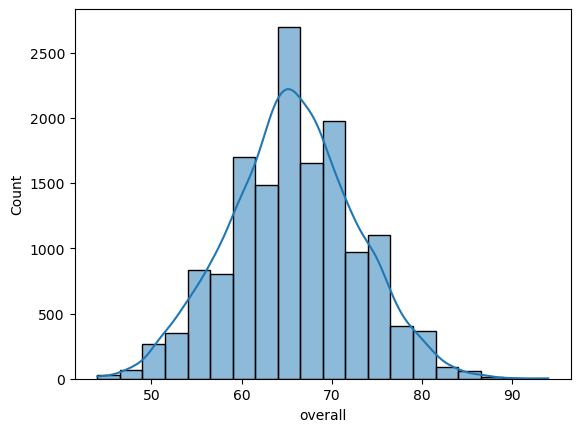

In [5]:
sns.histplot(df['overall'], bins=20, kde=True)

<Axes: >

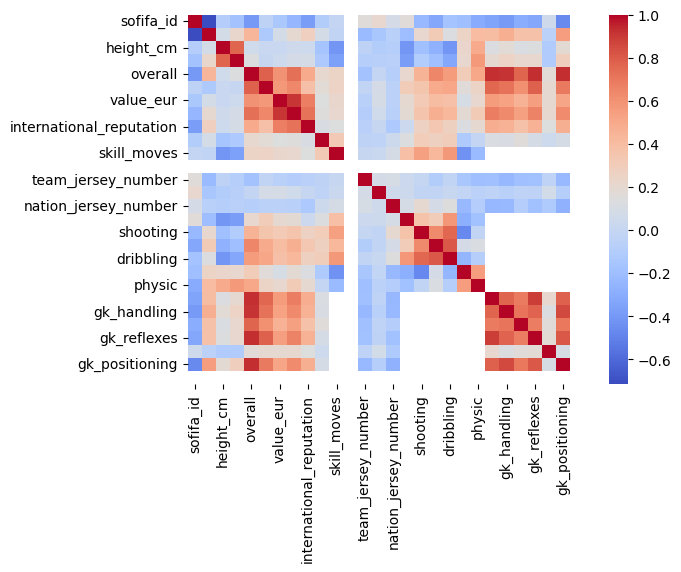

In [6]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, cmap='coolwarm')


In [7]:
numeric_df = df.select_dtypes(include=np.number)

X = numeric_df.drop(columns=['overall'])
y = numeric_df['overall']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

In [10]:
model.fit(X_train, y_train)

# 8. Predictions
y_pred = model.predict(X_test)


In [11]:
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE : 0.23898051729929456
RMSE: 0.45337371363921447
R2 Score: 0.995838861727805
